In [4]:
import matplotlib.pylab as plt 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form: 

$$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}$$


#### 1.1 What are the rows of $\mathbf{X}$?

The rows of $\mathbf{X}$ represent individual data samples or obeservations. Each row contains the values of all input variables for a single sample in the dataset. For example, if there are $N$ data points and $d$ input variables, then each row corresponds to one data point with its $d$ input variables.\
To have a concrete example, consider that we are prediciting house prices with three features:
- size (in $m^2$)
- number of bedrooms
- age of the house (in years) 

If put in the format of an $\mathbf{X}$ matrix, it would look like: 

| House (row) | Size (m²) | Bedrooms | Age (years) |
|-------------|-----------|----------|-------------|
| 1           |   100     |    3     |     10      |
| 2           |    80     |    2     |     20      |
| 3           |   120     |    4     |      5      |
| 4           |    90     |    3     |     15      |

So each row is a house (data sample, $N$) and each column is a input variable (size, bedrooms, age, $d$).

#### 1.2 What are the columns of $\mathbf{X}$?

The columns of $\mathbf{X}$ represent the different input variables in the dataset. Each column contains the values of a single input variable for all samples. Taking the same example as previously, if there are $d$ input variables, then there are $d$ columns and each column corresponds to one specific input variable across all data points. Taking, the previous house example as well, this would be the size, bedrooms or age.

Often, we write the equation above as:

$$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

In this case, $\mathbf{\tilde{X}}$ is the matrix $\mathbf{X}$ with an extra column of ones added to account for the intercept term in linear regression.\
If $\mathbf{X}$ originally has shape $(N,d)$ (as previously with $N$ number of samples and $d$ the number of input variables), then $\mathbf{\tilde{X}}$ will have shape $(N, d + 1)$. The extra column of ones allows the model to learn the intercept, previously named $\mathbf{w_0}$. This value allows the model to fit data that does not pass through the origin (0,0). \
Coming back to the previous house example, if $\mathbf{X}$ is:
$$
\mathbf{X} = \begin{bmatrix}
100 & 3 & 10 \\
80 & 2 & 20 \\
120 & 4 & 5 \\
90 & 3 & 15 \\
\end{bmatrix}
$$

then $\mathbf{\tilde{X}}$ (with an extra column of ones for the intercept) is:
$$
\mathbf{\tilde{X}} = \begin{bmatrix}
100 & 3 & 10 & 1 \\
80 & 2 & 20 & 1 \\
120 & 4 & 5 & 1 \\
90 & 3 & 15 & 1 \\
\end{bmatrix}
$$

So here there is a change from a $\mathbf{4 \times 3}$ to a $\mathbf{4 \times 4}$ matrix.

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$.

In [8]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector ** 2)
    return mean_squared_error


In [9]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

In [ ]:
#Test celln for what code should run

print(mean_squared_error(np.array([0, 0, 0])))
print(mean_squared_error(np.array([1, 1, 1])))

0.0
1.0


Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error?

In [12]:
x_axis = np.linspace(-10,10,100) # change as you wish for your plot
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

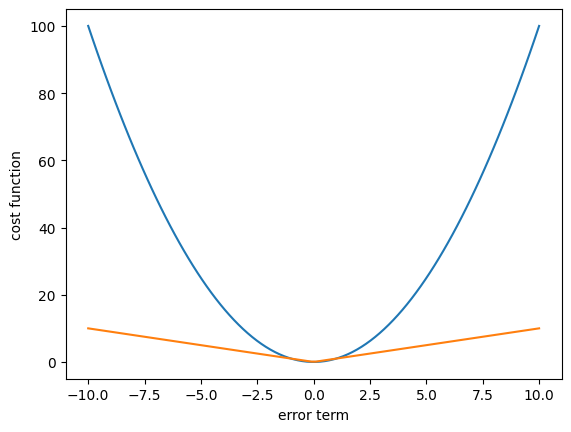

In [13]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

The MSE cost function has a parabolic form that increases quadratically with error, making it highly sensitive to large deviations. In contrast, the MAE cost function is V-shaped and increases linearly, giving equal importance to all errors and being more robust to outliers.

#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

#### Differentiability and Implications for Gradient-Based Optimization

Let the prediction error be denoted by: $$\epsilon = \hat{y} - y$$

##### Mean Squared Error (MSE)
$$J_{\text{MSE}}(\epsilon) = \epsilon^2$$
The derivative is:
$$\frac{dJ_{\text{MSE}}}{d\epsilon} = 2\epsilon$$
The MSE loss function is smooth and differentiable for all $\epsilon$.  
This implies that its gradient increases linearly with the error magnitude, meaning large errors produce larger updates during optimization.  
This property allows gradient descent and other first-order methods to converge efficiently and smoothly.

##### Mean Absolute Error (MAE)
$$J_{\text{MAE}}(\epsilon) = |\epsilon|$$
The derivative is:

$$\frac{dJ_{\text{MAE}}}{d\epsilon} =
\begin{cases}
+1, & \text{if } \epsilon > 0 \\
-1, & \text{if } \epsilon < 0
\end{cases}
$$
At $\epsilon = 0$, the derivative is undefined due to the sharp corner at the origin.

As a result, the MAE loss function is not differentiable at $\epsilon = 0$, though it is differentiable everywhere else.  
This implies that in gradient-based optimization, this causes issues because the gradient direction changes abruptly near zero, and algorithms must rely on subgradients or smoothing approximations.  
Despite this, MAE remains more robust to outliers, since its gradient magnitude is constant and not amplified by large errors.


  
Overall,the MSE cost function is fully differentiable and well-suited for standard gradient descent, while the MAE function introduces a non-differentiable point at zero, making optimization less smooth but more resistant to outliers.


#### 1.7 Which loss function is more sensitive to outliers and why?

##### Mean Squared Error (MSE)
$$
J_{\text{MSE}}(\epsilon) = \epsilon^2
$$

The MSE loss squares each error term, which means that large errors are amplified quadratically.  
For example, an error of $\epsilon = 5$ contributes $25$ units to the cost, while an error of $\epsilon = 10$ contributes $100$.  
This rapid increase causes outliers: data points with large deviations from the predicted value—to dominate the total loss.

This means:
- Even a single large error can significantly affect the model’s parameter updates (as mentioned previously).
- Gradient descent will produce disproportionately large gradients for outliers, leading the model to adjust strongly in an attempt to reduce those few large errors.
- As a result, the model becomes highly sensitive to noisy or extreme data points.

MSE’s gradient is:
$$
\frac{dJ_{\text{MSE}}}{d\epsilon} = 2\epsilon
$$
which directly scales with the error magnitude, further reinforcing the influence of outliers on the optimization trajectory.

##### Mean Absolute Error (MAE)
$$
J_{\text{MAE}}(\epsilon) = |\epsilon|
$$

The MAE loss grows linearly with the size of the error:
- An error of $\epsilon = 5$ contributes $5$ units to the cost,
- An error of $\epsilon = 10$ contributes $10$,
so the relative impact of larger errors is much smaller than in MSE.

Its gradient is constant in magnitude:
$$
\frac{dJ_{\text{MAE}}}{d\epsilon} =
\begin{cases}
+1, & \text{if } \epsilon > 0 \\
-1, & \text{if } \epsilon < 0
\end{cases}
$$
Therefore, each data point contributes equally to the total gradient update, regardless of how large its error is.  
This makes MAE robust to outliers, since extreme values do not cause large swings in the loss or gradient.\
In conclusion, the Mean Squared Error (MSE) is more sensitive to outliers because its quadratic term heavily penalizes large deviations, causing them to dominate both the total cost and the gradient updates.  
In contrast, the Mean Absolute Error (MAE) grows linearly with error magnitude, so extreme values have a proportionally smaller effect, making it more robust to noise and outliers.



# 2. Regularization

### !!!Questions 2.1 to 2.13 are presented in a separated document 
Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

__< Your answer >__

#### 2.2 No solution

__< Your answer >__

#### 2.3 An infinite number of solutions

__< Your answer >__

#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)

__< Your answer >__

#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

__< Your answer >__

#### 2.6 Differentiate above formula step by step and show what will we have?

__< Your answer >__

#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

__< Your answer >__

#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

__< Your answer >__

#### 2.9 What is Willson’s plot and how does it help in outlier detection?

__< Your answer >__

#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

__< Your answer >__

#### 2.11 What will be the new cost function after adding the regularization term?

__< Your answer >__

#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

__< Your answer >__

#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

__< Your answer >__

#### 2.14  What is the shape of the parabola as a function of $a$?

In [8]:
def parabola(x, a = 1): 
    return a * x ** 2

In [9]:
x_axis_parabola = np.linspace(-10, 10, 100)

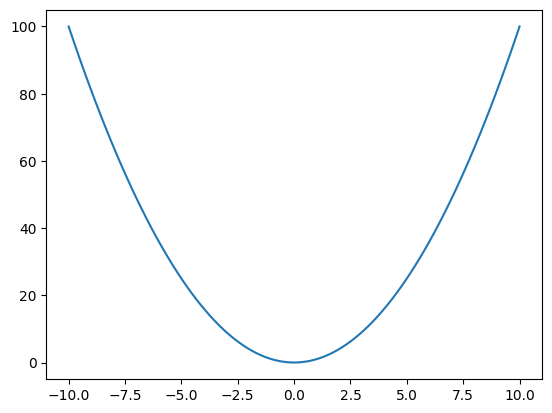

In [10]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

(-100.0, 0.0)

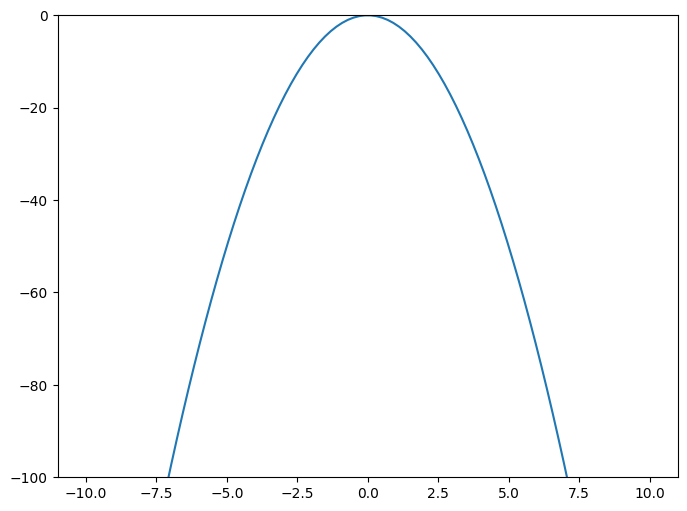

In [19]:
# Parabola with a negative value of a
a = -2
x_axis = np.linspace(-10, 10, 100)
y_axis = [a*i**2 for i in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis, y_axis)
plt.ylim(-100,0)

(-100.0, 0.0)

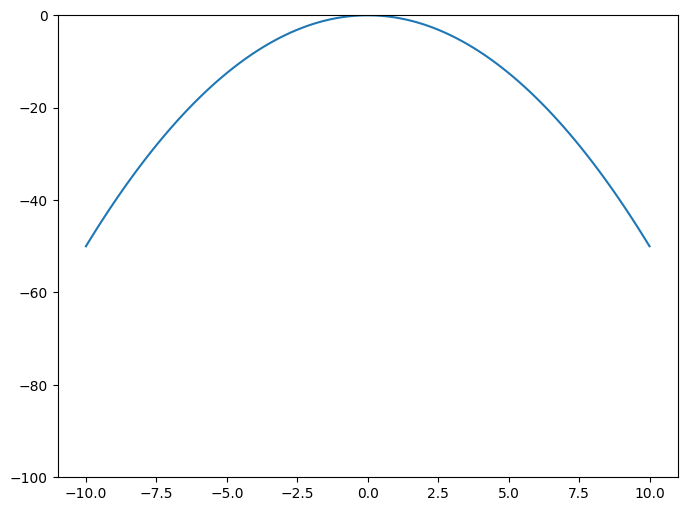

In [16]:
# Parabola with a negative value of a and a smaller value
a = -0.5
x_axis = np.linspace(-10, 10, 100)
y_axis = [a*i**2 for i in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis, y_axis)
plt.ylim(-100, 0)

(0.0, 100.0)

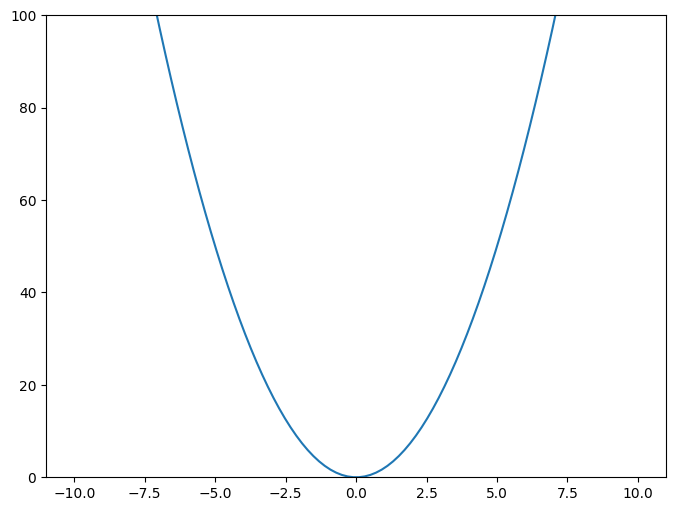

In [18]:
# Parabola with a ppositive value of a 
a = 2
x_axis = np.linspace(-10, 10, 100)
y_axis = [a*i**2 for i in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis, y_axis)
plt.ylim(0, 100)

(0.0, 100.0)

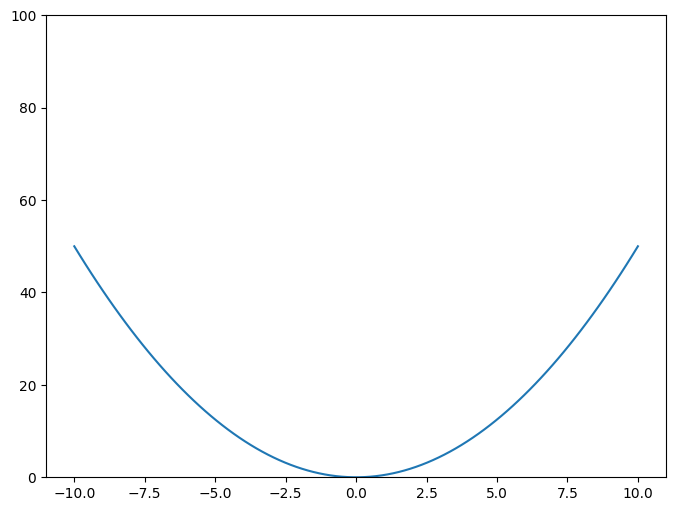

In [ ]:
# Parabola with a positive value of a and a smaller value
a = 0.5
x_axis = np.linspace(-10, 10, 100)
y_axis = [a*i**2 for i in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis, y_axis)
plt.ylim(0, 100)

The parabola varies according to the value of a. On the one hand, the sign is important; a negative value of a produces a downward-facing (concave) parabola, while a positive value produces an upward-facing parabola (convex). On the other hand, the value of a is important. If a is small (e.g. 0 < a < 1), the parabola is very wide, whereas if a is large, the parabola will be increasingly narrow.

#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [5]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [6]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [7]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 3, 4, 8, 16] # the polynomial degrees we will test; addition of degree 3, 4 and 8 to test the limits

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

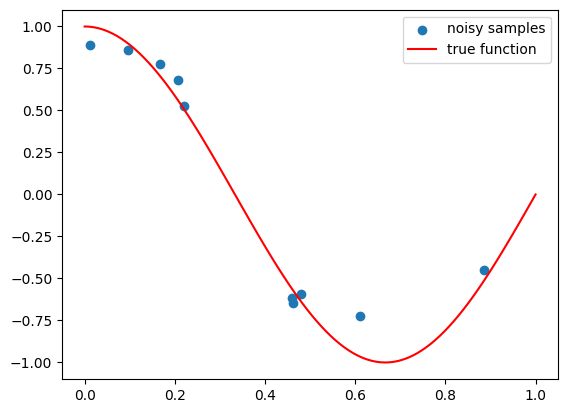

In [8]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

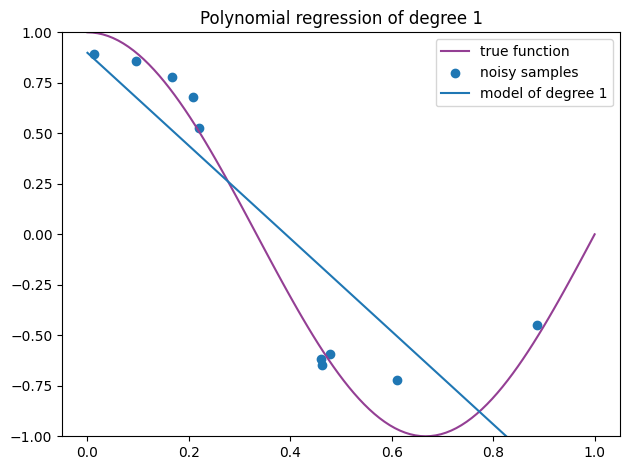

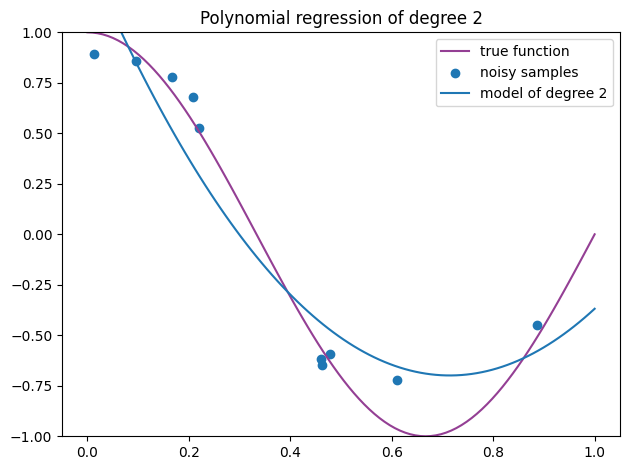

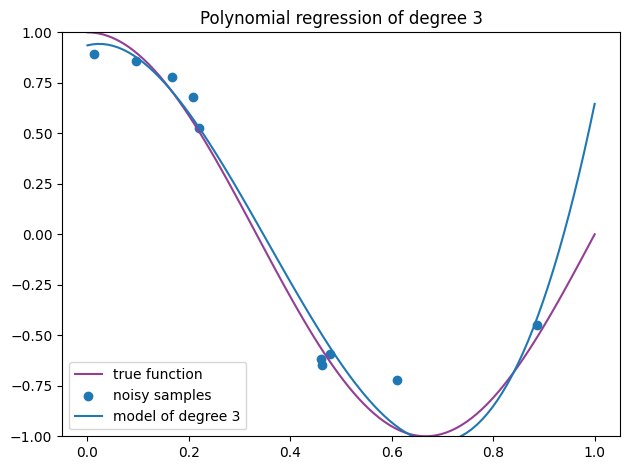

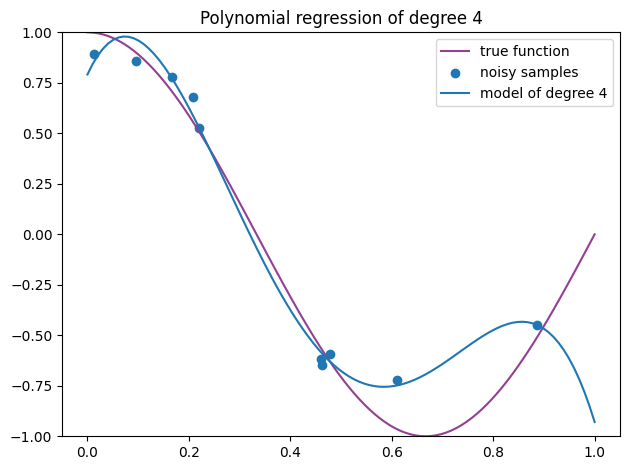

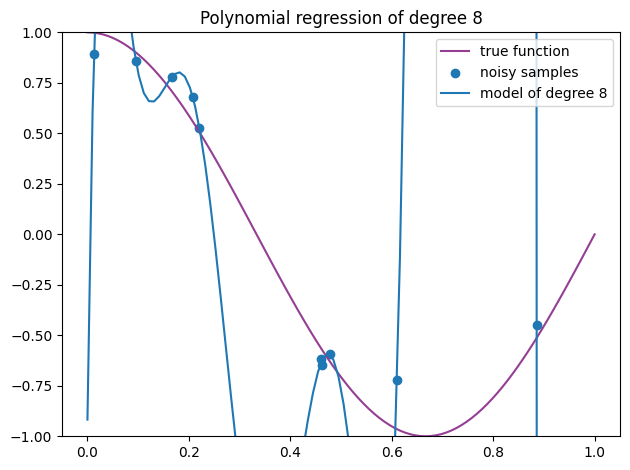

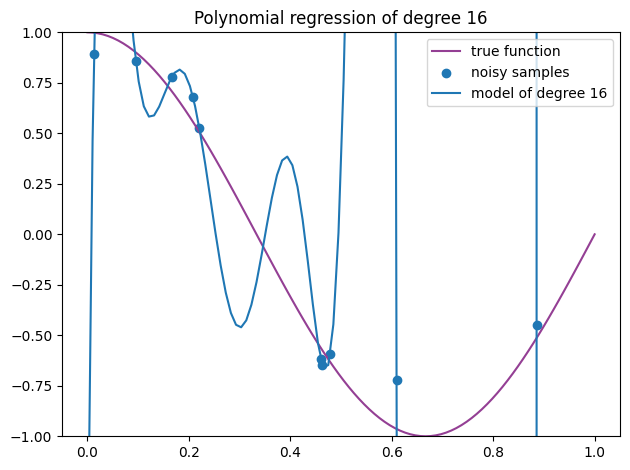

In [9]:
for i in degrees:
    polynomial_features = PolynomialFeatures(degree= i,
                                                include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, true_function(X_test), color = "#943F94", label = "true function")
    plt.scatter(X, y, label = "noisy samples")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label=f"model of degree {i}")
    plt.ylim(-1, 1)
    plt.title(f"Polynomial regression of degree {i}")
    plt.legend()
    plt.tight_layout()
    plt.show()




To plot the result, you can use the following code.

NB: The code below was integrated into the loop above testing and plotting graphs with different degrees for polynomial approximation (the requested degrees {1, 2, 16} were tested, as well as degrees 3, 4, and 8, in order to better understand the mechanism and find the ‘limit’ of degrees before it no longer converges towards the desired function).

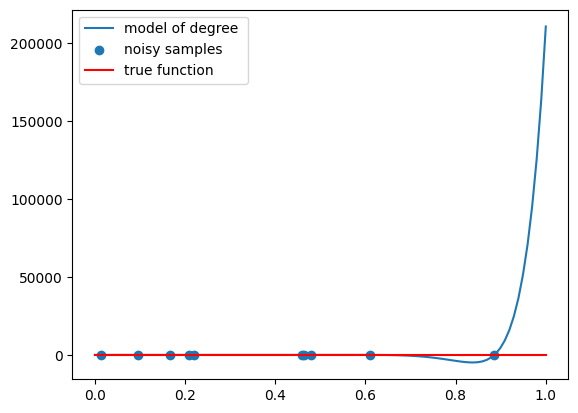

In [10]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

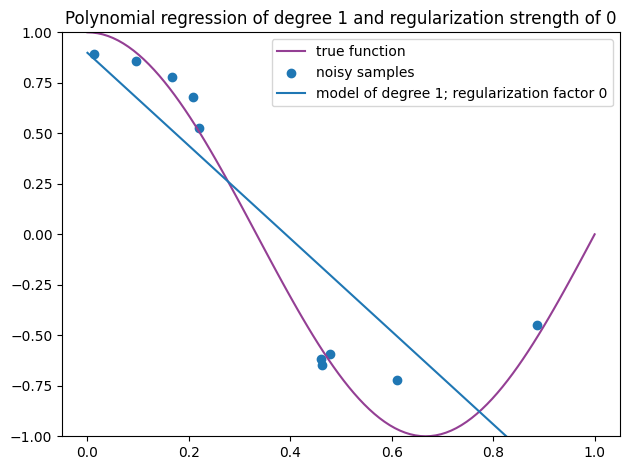

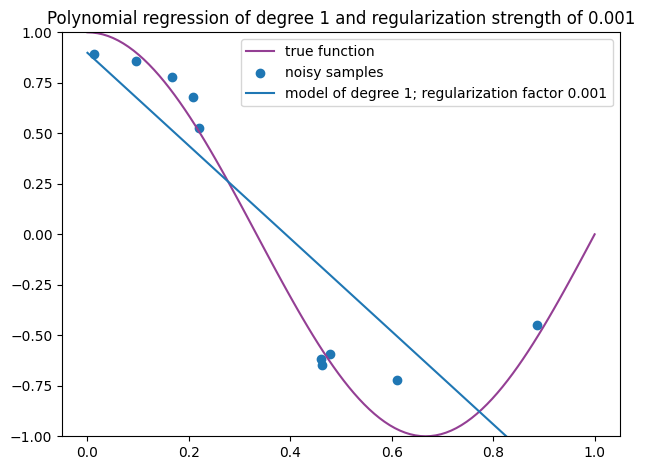

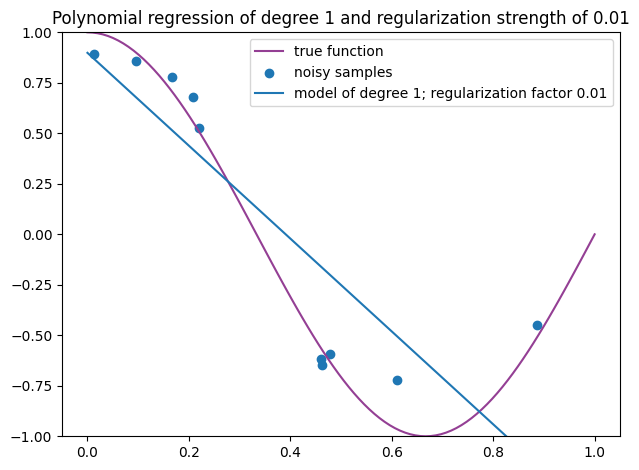

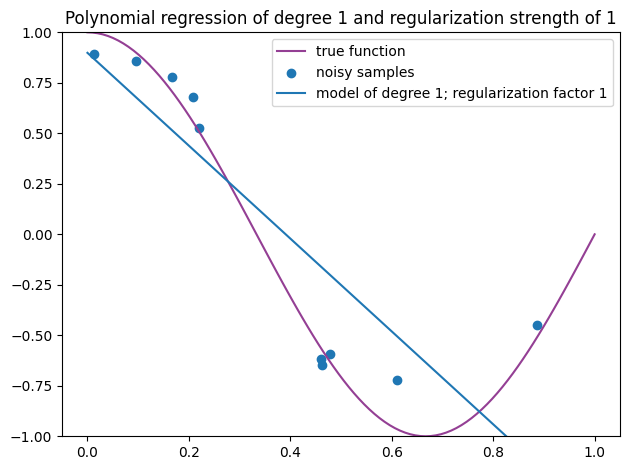

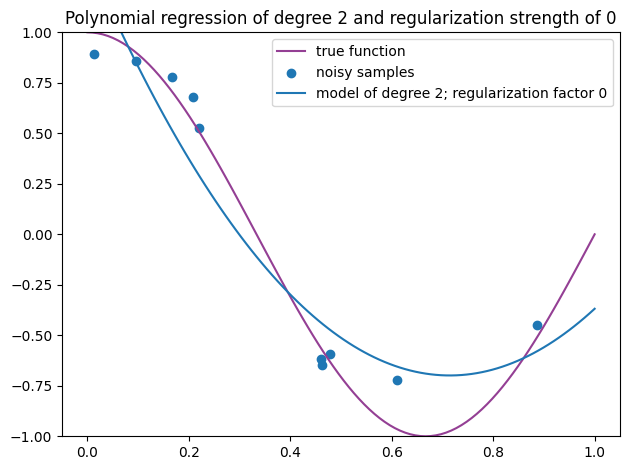

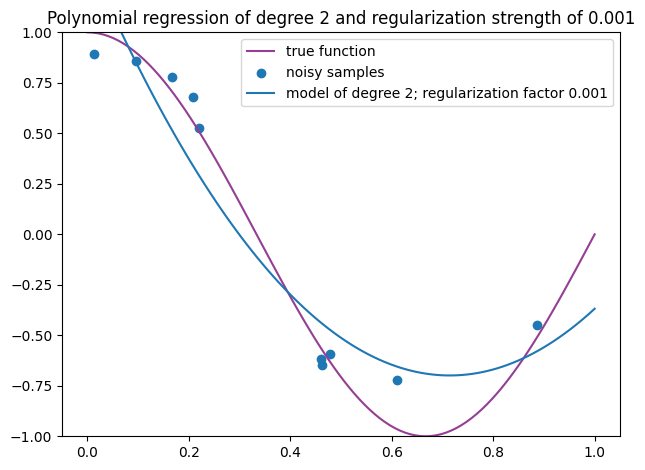

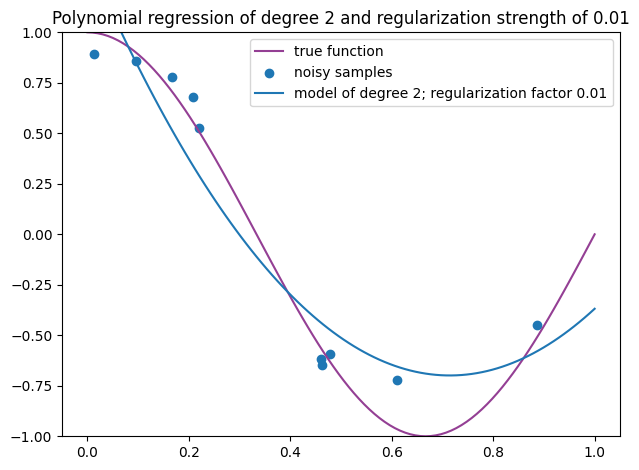

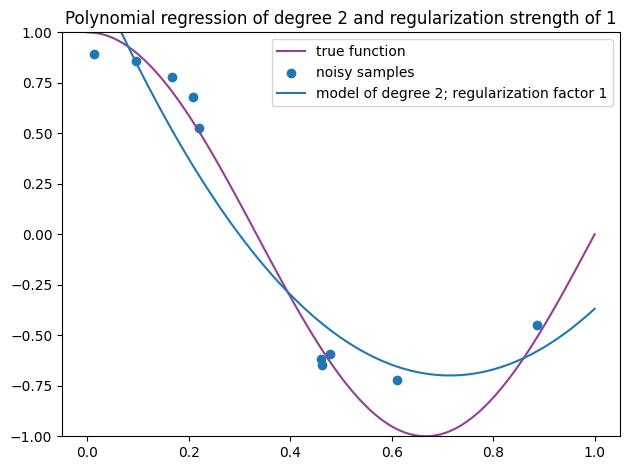

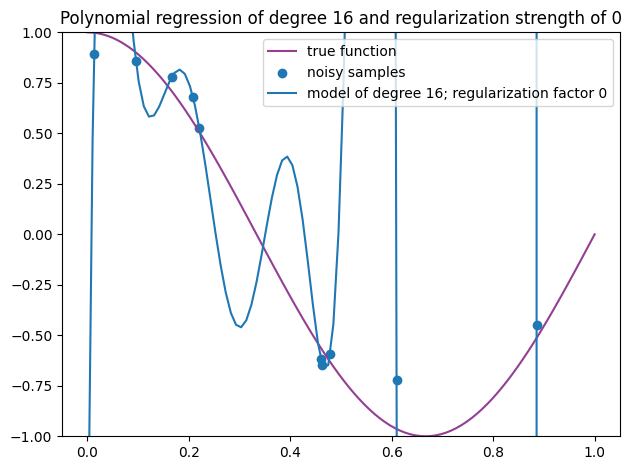

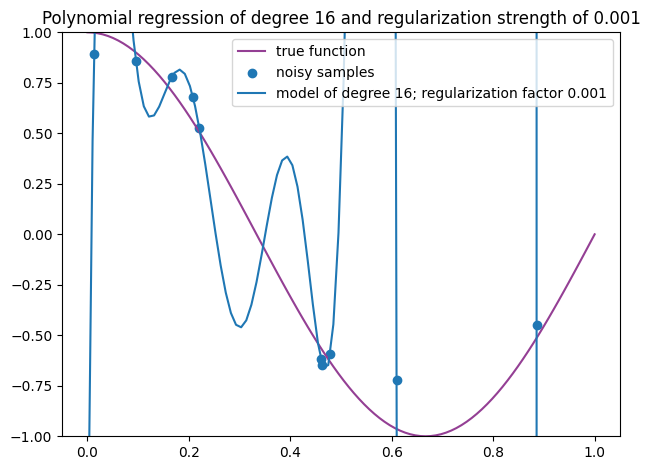

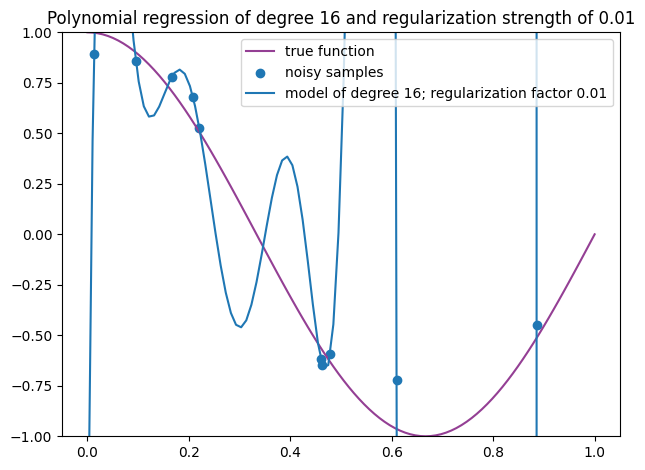

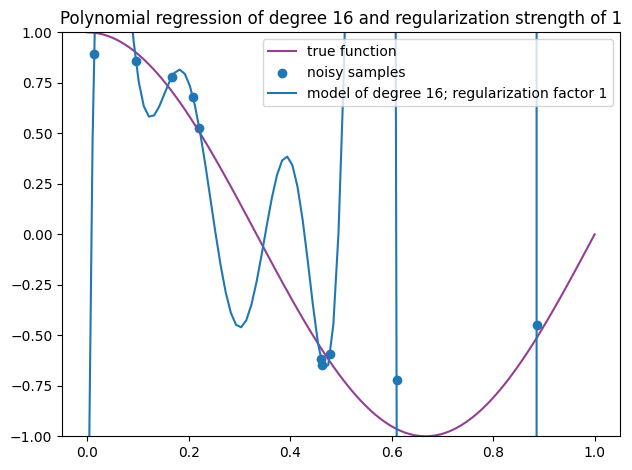

In [11]:
degrees_bis = [1, 2, 16]
for i in degrees_bis:
    polynomial_features = PolynomialFeatures(degree= i,
                                                include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)


    lambda_parameter = [0, 10**-3, 10**-2, 1]
    for j in lambda_parameter:
        polynomial_features = PolynomialFeatures(degree=1,
                                                    include_bias=False)
        ridge_regression = Ridge(alpha=i)
        pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                            ("ridge_regression", ridge_regression)])
        pipeline_ridge.fit(X[:, np.newaxis], y)
        
        plt.plot(X_test, true_function(X_test), color = "#943F94", label = "true function")
        plt.scatter(X, y, label = "noisy samples")
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label=f"model of degree {i}; regularization factor {j}")
        plt.ylim(-1, 1)
        plt.title(f"Polynomial regression of degree {i} and regularization strength of {j}")
        plt.legend()
        plt.tight_layout()
        plt.show()

### Comments on the influence of the degree and the regularization strength

Let us first discuss the influence of the degree chosen for polynomial regression. In such a model, we must choose which degree will be used for fitting (relative to a scatter plot) by a polynomial function given by the following expression:

$$
f(x) = \sum_{i}^{n} a_i x^i
$$

In theory, the higher the degree, the more the function will pass through the points in the data. This is what we observe in the simulation above (where only the degree varies). However, even if the points are ‘perfectly’ connected, the estimation of the $cos(1.5 \Pi x)$ function is poor and no longer corresponds to what is expected. This is a well-known problem called overfitting. To solve this issue, we can use Occam's razor principle. In machine learning, this means that simpler models are generally preferred because they tend to generalize better to unseen data. Following this principle helps reduce the risk of overfitting, where the model learns noise in the training data instead of the true underlying patterns (1). This allows to have better performances on unseen data. 
it is the a "trade off between how well the model fits the training data and how “simple” that model is" (2).

!!! ajouter un commentaire sur la smoothness

Second, the influence of the regularization strength has to be analysed. To this end, several graphs were plotted, varying both the regularization strength and the degree. By observing the graphs, we can say that ...

(1) Tavhare, A. Occam’s Razor in Machine Learning: The Principle of Parsimony. Medium. https://medium.com/@qjbqvwzmg/occams-razor-in-machine-learning-the-principle-of-parsimony-de110ce7fe13 (accessed 2025-10-15).\
(2) LeCun, Y. Machine Learning and Pattern Recognition, 2005.

#### 2.16 What do you observe if you change the number of samples from the function?

In [62]:
n_samples_higher = 20 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test; addition of degree 3, 4 and 8 to test the limits

X_h = np.sort(np.random.rand(n_samples_higher))
y_h = true_function(X_h) + np.random.randn(n_samples_higher) * 0.1 # add some scaled random noise

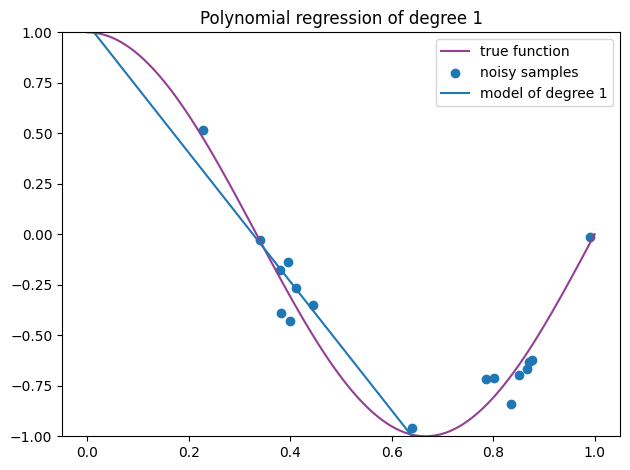

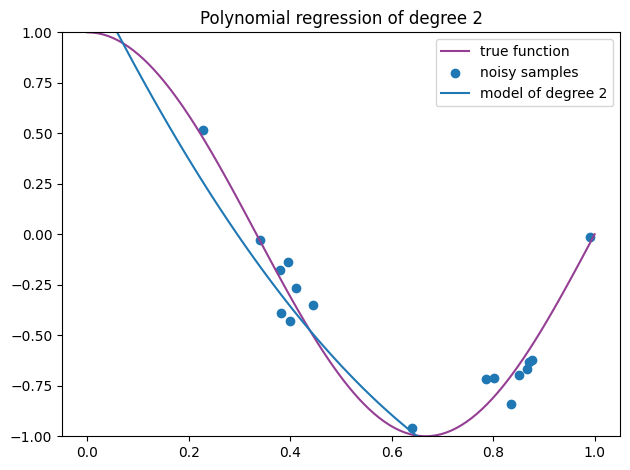

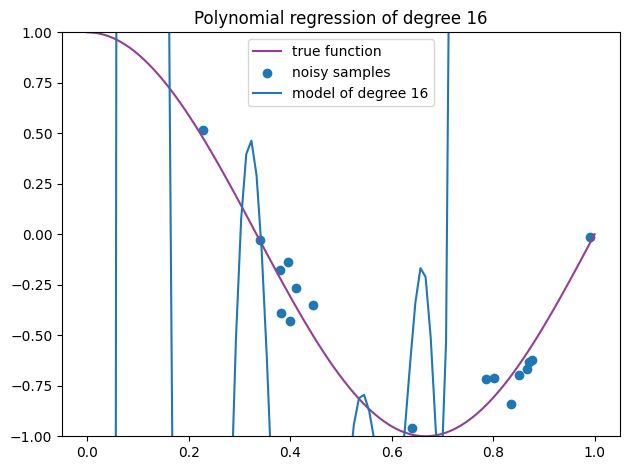

In [63]:
for i in degrees:
    polynomial_features = PolynomialFeatures(degree= i,
                                                include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, true_function(X_test), color = "#943F94", label = "true function")
    plt.scatter(X_h, y_h, label = "noisy samples")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label=f"model of degree {i}")
    plt.ylim(-1, 1)
    plt.title(f"Polynomial regression of degree {i}")
    plt.legend()
    plt.tight_layout()
    plt.show()

__< Your answer >__

#### 2.17 Why do we need a test set in machine learning?

In machine learning, a test set is essential to evaluate how well a model performs on new, unseen data. When building such a model, the available data is split into at least two sets: the training set (data that will be used to train the model and to help the model learn patterns from the data) and the test set (the data that will be used to test the model's performance after training is complete). 

This separation is crucial because if we put all the available data in the training set, we could never test whether the model is effective or not. The test set allows us to assess the accuracy of the model on new (or unseen) data and to improve it if the output does not correspond to the expected results. This component is kown as the Generalization. If this component is not present, the model might simply "memorize" the training dataset and appears to perform well when used on these data, even if it would not generalize well to unseen data. This problem is called overfitting and occurs when the algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions from any data other than the training data (3).

(3) What is Overfitting? | IBM. https://www.ibm.com/think/topics/overfitting (accessed 2025-10-15). 

#### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

__< Your answer >__